# Question 1
Soit une plaque carrée stratifiée en graphite-époxyde $[±30]_T$ de 20 cm de côté. Cette plaque est chauffée
à $175\degree C$ pendant sa fabrication et est refroidie à température ambiante $(25\degree C)$.

## a) Calculez les déformations et les courbures $(\epsilon_x^0$, ..., $\kappa_{xy}^0)$ induites par le chargement thermique

In [1]:
from laminate import *
from composite import *

lam = Laminate(thetas=LaminateAngles("[±30]"), composite_type=CompositeType.Graphite_Epoxy, delta_t=-150)
eps_kap = lam.solve_eps_kap_n_m(ns=[0, 0, 0], ms=[0, 0, 0])

print(eps_kap)

{eps_x: -21.611, eps_y: -2679.300, gam_xy: 0, kap_x: 0.0, kap_xy: -18.144, kap_y: 0.0}


## b) Calculez les contraintes résiduelles dans le repère $(x, y)$ et le repère $(1, 2)$

In [2]:
residual_stresses = lam.solve_residual_stresses(eps_kap)
local_residual_stresses = lam.local_residual_stresses(eps_kap)
print("Contraintes résiduelles dans le repère (x, y):")
print(residual_stresses)
print("Contraintes résiduelles dans le repère (1, 2):")
print(local_residual_stresses) # sigma_1 = 77.64, sigma_2 = 6.968, tau_12 = -4.140

Contraintes résiduelles dans le repère (x, y):
{30: {sigma_x: -63.559, sigma_y: -21.052, tau_xy: -57.067}, -30: {sigma_x: -63.559, sigma_y: -21.052, tau_xy: 57.067}}
Contraintes résiduelles dans le repère (1, 2):
{30: {sigma_1: -102.354, sigma_2: 17.743, tau_12: -10.127}, -30: {sigma_1: -102.354, sigma_2: 17.743, tau_12: 10.127}}


## c) Calculez la déformée $w^0(x, y)$ et faites un croquis en indiquant les axes $(x, y, z)$. Quel est le déplacement hors du plan maximum?

0.0 0.0 -18.144


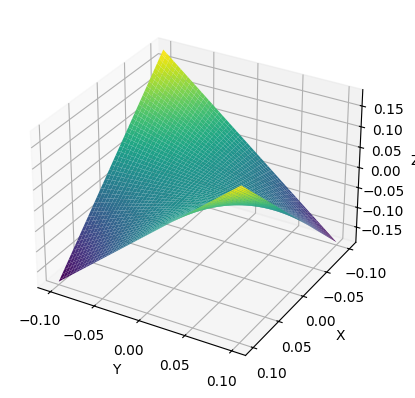

Max curvature: 0.1814


In [3]:
lam.plot_curvature(eps_kap, plate_dimensions=(0.2, 0.2)) # 0.09072

# Question 2
La partie cylindrique du submersible le Titan a une longueur de 2.54 m et un diamètre externe D égal à 1.7 m. Le stratifié est composé de couches de composite graphite/époxy alternées à 0 et 90 degrés pour former une paroi de 5 pouces (127 mm) d’épaisseur (prendre les propriétés données en cours et supposer que l’épaisseur d’une couche est 0.150 mm). On supposera que la séquence de plis est $[90_{141}/0_{141}/90_{141}]_S$ avec les plis à 0 degré alignés avec le sens de la longueur du cylindre et les plis à 90 degrés alignés dans
la direction circonférentielle. La pression en service est de 46 MPa. La température de fabrication est T = $177\degree C$ et celle en service est de $4\degree C$. 

## a) Calculez quelle pression causera la rupture de la première couche avec le critère de la contrainte maximale. Précisez dans quelles couches la rupture se produit et identifiez le mode de rupture. En déduire le facteur de sécurité par rapport à la rupture.

In [4]:
lam = Laminate(thetas=LaminateAngles("[90_141/0_141/90_141]S"), composite_type=CompositeType.Graphite_Epoxy, delta_t=-173)
pressures_max = lam.failure_pressure_criteria(d=1.7, criteria=FailureCriteria.MaxCriteria)
print(pressures_max)


{90: {'p': 8.66339328179843, 'sigma_1': 59.86, 'sigma_2': 50.0000000000000, 'tau_12': 0.0, 'sigma_1_actual': 418.27, 'sigma_2_actual': 80.77, 'tau_12_actual': 0.0}, 0: {'p': 3.79818644126313, 'sigma_1': -53.82, 'sigma_2': 50.0000000000000, 'tau_12': 0.0, 'sigma_1_actual': 300.63, 'sigma_2_actual': 87.81, 'tau_12_actual': 0.0}}


In [5]:
sigma_1_actuals = [pressures_max[key]["sigma_1_actual"] for key in pressures_max]
sigma_2_actuals = [pressures_max[key]["sigma_2_actual"] for key in pressures_max]
tau_12_actuals = [pressures_max[key]["tau_12_actual"] for key in pressures_max]
# security_factors = [comp.fs_max((sigma_1_actuals[index], sigma_2_actuals[index], tau_12_actuals[index])) for index, comp in enumerate(lam.composites)]

count = 0
unique_angles = []
security_factors = []
for comp in lam.composites:
    angle = round(np.degrees(comp.angle))
    if angle in unique_angles:
        continue
    unique_angles.append(angle)
    security_factors.append(comp.fs_max((sigma_1_actuals[count], sigma_2_actuals[count], tau_12_actuals[count])))
    count += 1

print("Facteurs de sécurité avec critère de contrainte maximale:")
print(security_factors)

Facteurs de sécurité avec critère de contrainte maximale:
[0.619045316051652, 0.569414015147302]


## b)  Calculez quelle pression causera la rupture de la première couche avec le critère de Tsai-Wu. Précisez dans quelles couches la rupture se produit et commentez sur le mode de rupture. En déduire le facteur de sécurité par rapport à la rupture.

In [6]:
pressures_tsai_wu = lam.failure_pressure_criteria(d=1.7, criteria=FailureCriteria.TsaiWu)
print(pressures_tsai_wu)

{90: {'p': 9.60329752766156, 'sigma_1': 68.89, 'sigma_2': 50.77, 'tau_12': 0.0, 'sigma_1_actual': 418.27, 'sigma_2_actual': 80.77, 'tau_12_actual': 0.0}, 0: {'p': 2.83991217875744, 'sigma_1': -61.87, 'sigma_2': 49.14, 'tau_12': 0.0, 'sigma_1_actual': 300.63, 'sigma_2_actual': 87.81, 'tau_12_actual': 0.0}}


In [8]:
sigma_1_actuals = [pressures_max[key]["sigma_1_actual"] for key in pressures_max]
sigma_2_actuals = [pressures_max[key]["sigma_2_actual"] for key in pressures_max]
tau_12_actuals = [pressures_max[key]["tau_12_actual"] for key in pressures_max]

count = 0
unique_angles = []
security_factors = []
for comp in lam.composites:
    angle = round(np.degrees(comp.angle))
    if angle in unique_angles:
        continue
    unique_angles.append(angle)
    security_factors.append(comp.fs_tsai_wu((sigma_1_actuals[count], sigma_2_actuals[count], tau_12_actuals[count])))
    count += 1

print("Facteurs de sécurité avec critère de Tsai-Wu:")
print(security_factors)

Facteurs de sécurité avec critère de Tsai-Wu:
[0.670903709836400, 0.604054174604409]


## c) Comparer les résultats obtenus et commenter 

Dans les deux cas, la rupture se produit dans la couche à $0\degree$, mais les pressions de rupture sont différentes. Le critère de Tsai-Wu est plus conservateur que le critère de la contrainte maximale, étant de 3.80MPa contre le 2.84MPa du critère de la contrainte maximale. La rupture se produira dans la direction 2 en traction selon le critère de déformation maximale. 